**Reading URL for checking**


In [12]:
# import urllib library 
from urllib.request import urlopen 

# import json 
import json 
# store the URL in url as 
# parameter for urlopen 
url = "https://resource.sgu.se/oppnadata/grundvatten/api/grundvattennivaer/nivaer/station/1_4?format=json"

# store the response of URL 
response = urlopen(url) 

# storing the JSON response 
# from url in data 
data_json = json.loads(response.read()) 

# print the json response 
print(data_json) 


**Plotting data from url**


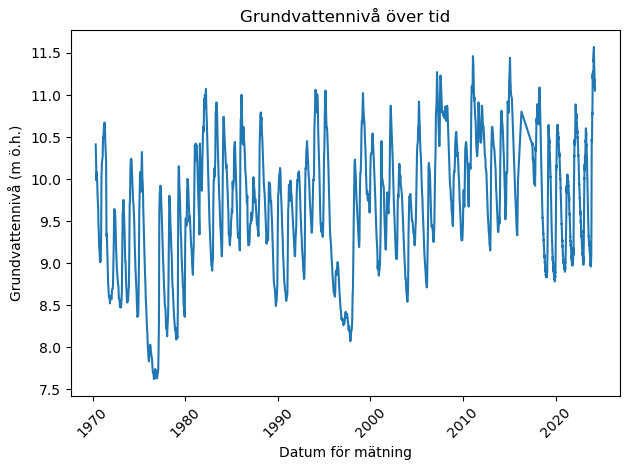

In [17]:
# import necessary libraries
from urllib.request import urlopen 
import json 
from datetime import datetime
import matplotlib.pyplot as plt

# store the URL in url as parameter for urlopen 
url = "https://resource.sgu.se/oppnadata/grundvatten/api/grundvattennivaer/nivaer/station/1_4?format=json"

# store the response of URL 
response = urlopen(url) 

# storing the JSON response from url in data 
data_json = json.loads(response.read()) 

# Extracting data from the "Mätningar" field
timestamps = []
water_levels = []
for feature in data_json['features']:
    measurements = feature['properties'].get('Mätningar', [])  # Get measurements, default to empty list if key doesn't exist
    for measurement in measurements:
        datum = measurement.get('datum_for_matning')
        grundvattenniva = measurement.get('grundvattenniva_m_o.h.')
        if datum and grundvattenniva:
            timestamps.append(datetime.fromisoformat(datum))
            water_levels.append(grundvattenniva)

# Plotting the data
plt.plot(timestamps, water_levels)
plt.xlabel('Datum för mätning')
plt.ylabel('Grundvattennivå (m ö.h.)')
plt.title('Grundvattennivå över tid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Make interactive plot**


In [19]:
# import necessary libraries
from urllib.request import urlopen 
import json 
from datetime import datetime
import plotly.graph_objects as go

# store the URL in url as parameter for urlopen 
url = "https://resource.sgu.se/oppnadata/grundvatten/api/grundvattennivaer/nivaer/station/1_4?format=json"

# store the response of URL 
response = urlopen(url) 

# storing the JSON response from url in data 
data_json = json.loads(response.read()) 

# Extracting data from the "Mätningar" field
timestamps = []
water_levels = []
for feature in data_json['features']:
    measurements = feature['properties'].get('Mätningar', [])  # Get measurements, default to empty list if key doesn't exist
    for measurement in measurements:
        datum = measurement.get('datum_for_matning')
        grundvattenniva = measurement.get('grundvattenniva_m_o.h.')
        if datum and grundvattenniva:
            timestamps.append(datetime.fromisoformat(datum))
            water_levels.append(grundvattenniva)

# Plotting the data
fig = go.Figure(data=go.Scatter(x=timestamps, y=water_levels, mode='lines+markers'))
fig.update_layout(title='Grundvattennivå över tid', xaxis_title='Datum för mätning', yaxis_title='Grundvattennivå (m ö.h.)')
fig.show()



**Statistics and seasonal variation**

Maximum water level: 11.572
Minimum water level: 7.623
Mean water level: 9.82878936143517
Monthly Mean Water Levels:
month
1      9.826508
2     10.200483
3     10.522955
4     10.531385
5     10.335738
6     10.059785
7      9.803055
8      9.522840
9      9.343578
10     9.220426
11     9.278440
12     9.498646
Name: water_level, dtype: float64


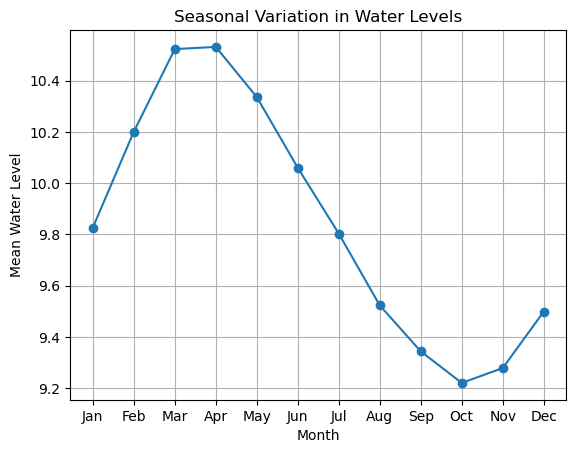

In [15]:
import pandas as pd

# Extracting data from the "Mätningar" field
timestamps = []
water_levels = []
for feature in data_json['features']:
    measurements = feature['properties'].get('Mätningar', [])  # Get measurements, default to empty list if key doesn't exist
    for measurement in measurements:
        datum = measurement.get('datum_for_matning')
        grundvattenniva = measurement.get('grundvattenniva_m_o.h.')
        if datum and grundvattenniva:
            timestamps.append(datetime.fromisoformat(datum))
            water_levels.append(grundvattenniva)

# Calculate statistics
max_water_level = max(water_levels)
min_water_level = min(water_levels)
mean_water_level = sum(water_levels) / len(water_levels)

# Print statistics
print("Maximum water level:", max_water_level)
print("Minimum water level:", min_water_level)
print("Mean water level:", mean_water_level)

# Create a DataFrame from the timestamps and water levels
df = pd.DataFrame({'timestamp': timestamps, 'water_level': water_levels})

# Extract month from the timestamp
df['month'] = df['timestamp'].dt.month

# Group by month and calculate mean water level for each month
monthly_mean = df.groupby('month')['water_level'].mean()

# Print the monthly mean water levels
print("Monthly Mean Water Levels:")
print(monthly_mean)

import matplotlib.pyplot as plt

# Plot monthly mean water levels
plt.plot(monthly_mean.index, monthly_mean.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Water Level')
plt.title('Seasonal Variation in Water Levels')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



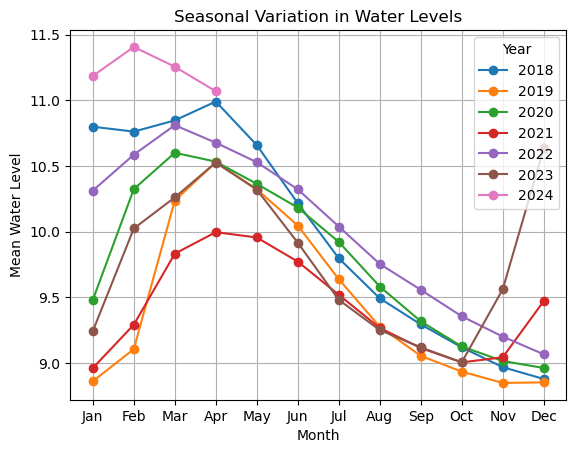

In [27]:
# Define the range of years you're interested in
start_year = 2018
end_year = 2024

# Filter the DataFrame to only include data from the selected years
filtered_monthly_mean = monthly_mean[(monthly_mean['year'] >= start_year) & (monthly_mean['year'] <= end_year)]

# Plot monthly mean water levels for each year in the selected range
for year in filtered_monthly_mean['year'].unique():
    monthly_data = filtered_monthly_mean[filtered_monthly_mean['year'] == year]
    plt.plot(monthly_data['month'], monthly_data['water_level'], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Mean Water Level')
plt.title('Seasonal Variation in Water Levels')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()
